## Loading Data from Google Drive. 
Please change file path to the location of IMDb movies.csv when you run notebook. 

In [1]:
# Import python moduls for Data Exploration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
## Loading Data
movies_df = pd.read_csv('./IMDb movies.csv')


/home/bharath/datascience/env3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# Helper Methods
def to_array(elements):
  """
  Converts a comma seperated list into an array
  """
  elements = str(elements)
  return elements.split(", ")

def generate_unique_list(array):
  """
  Gets a unique list of elments in an array. 
  """
  unique_val = {}
  counter = 0
  for i in array:
      for val in i:
          if val not in unique_val.keys():
              unique_val[val] = counter
              counter +=1
  return unique_val

In [12]:
#check for null values in each column
print(movies_df.isnull().sum())
movies_df.describe(include='all')
movies_df.shape

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     63
language                   599
director                    81
writer                    1374
production_company        3913
actors                       0
description               1767
avg_vote                     0
votes                        0
budget                   44016
usa_gross_income         50045
worlwide_gross_income    34158
metascore                51656
reviews_from_users        6307
reviews_from_critics      9192
dtype: int64


(64032, 22)

# Movie CSV Explorations Findings
Looking at the dataset there are quite a few fields where the majority of the values are NULL. For example, budget, usa_gross_income, worlwide_gross_income, metascore. These columns will be dropped since, since a lot of the movie income data would need to be collected. 

# Initial Data Exploration Notes
Since the movies from this dataset contains movies both silent movies and regular movies. We decided what we want to only look at non silent movies, so look for all movies release after 1980.

Also Majority of the values are string values, so we will need to figure out how to convert them to a numerial value. A few fields are a list so we need to figure out how to handle them. The actors and genre field are lists. Possible solutions is only pick a random genre from genre list for a specific movie. We can split actors into a lead actor and lead actress. Have a count of number actors in the movie. 

Create a popularity score for director, lead actor, lead actress, and production company. Popularity score is the count of how many times the person or company frequency of the value in the dataset. 







In [11]:
# Data Exploration
# Considering the movies released after 1980
print("Movie CSV column information")
movies_df.info()

#Clean up movie year
def cleanup(x):
  '''
  Used to find what movies had strings as a value for year instead of number
  '''
  try:
    y = int(x) < 1980 
  except:
    print(x)
  return x

## Cleaning up some bad year values in dataset
movies_df['year'] = np.where((movies_df.year == 'TV Movie 2019'),2019,movies_df.year)

movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')

movies_df = movies_df.drop(movies_df[movies_df['year'] < 1980].index)

# Bad production company name ['Plus Entertainment (+Entertainment)', 'Stalker Production (']
movies_df.loc[movies_df.imdb_title_id == 'tt5244812', 'production_company'] = 'Plus Entertainment'
movies_df.loc[movies_df.imdb_title_id == 'tt7614016', 'production_company'] = 'Stalker Production'

# Convert avg_vote to int 
movies_df['avg_vote'] = movies_df['avg_vote'].astype('int32')

# Get the first 3 actors in the actors column for a movie. 
def first_three_actors(x):
  arr = to_array(x)
  return ", ".join(arr[:3])

movies_df['actors'] = movies_df['actors'].apply(lambda x: first_three_actors(x))

movies_df = movies_df.drop(columns=['budget','usa_gross_income','worlwide_gross_income','metascore','votes','reviews_from_users','reviews_from_critics','description'])
movies_df.head()



Movie CSV column information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64032 entries, 560 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          64032 non-null  object 
 1   title                  64032 non-null  object 
 2   original_title         64032 non-null  object 
 3   year                   64032 non-null  int64  
 4   date_published         64032 non-null  object 
 5   genre                  64032 non-null  object 
 6   duration               64032 non-null  int64  
 7   country                63969 non-null  object 
 8   language               63433 non-null  object 
 9   director               63951 non-null  object 
 10  writer                 62658 non-null  object 
 11  production_company     60119 non-null  object 
 12  actors                 63972 non-null  object 
 13  description            62265 non-null  object 
 14  avg_vote               

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
560,tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"Drama, Romance",45,France,"None, French",Jean Epstein,"Jean Epstein, Paul Morand",Films Jean Epstein,"Jeanne Helbling, Suzy Pierson, Olga Day",Psychological narrative avantgarde film about ...,7,759,NaN,NaN,NaN,NaN,7.0,4.0
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,"Steven Rogers, James Mangold",Konrad Pictures,"Meg Ryan, Hugh Jackman, Liev Schreiber",An English Duke from 1876 is inadvertedly drag...,6,77852,$ 48000000,$ 47121859,$ 76019048,44.0,341.0,115.0
4653,tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"Drama, War",118,UK,"English, Italian",Michael Radford,"Jessie Kesson, John Francis Lane",Associated-Rediffusion Television,"Phyllis Logan, Giovanni Mauriello, Gianluca Fa...","Set in 1943 Scotland during World War II, Jani...",6,252,NaN,NaN,NaN,NaN,3.0,10.0
13237,tt0062181,Mani in alto!,Rece do góry,1981,1985-01-21,Drama,76,Poland,Polish,Jerzy Skolimowski,"Andrzej Kostenko, Jerzy Skolimowski",Arte France Cinéma,"Jerzy Skolimowski, Joanna Szczerbic, Tadeusz L...","Censored by the Polish authorities, this movie...",6,296,NaN,NaN,NaN,NaN,2.0,6.0
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"Action, Crime",97,Japan,Japanese,Kinji Fukasaku,"Kinji Fukasaku, Fumio Kônami",Toei Company,"Kôji Tsuruta, Tomisaburô Wakayama, Bunta Sugawara",Coming out of jail and hoping for a quiet life...,7,168,NaN,NaN,NaN,NaN,3.0,5.0


In [14]:

#Removing null values in each column
print(movies_df.isnull().sum())
movies_df = movies_df.fillna('')
print(movies_df.isnull().sum())


imdb_title_id            0
title                    0
original_title           0
year                     0
date_published           0
genre                    0
duration                 0
country                 63
language               599
director                81
writer                1374
production_company    3913
actors                   0
avg_vote                 0
dtype: int64
imdb_title_id         0
title                 0
original_title        0
year                  0
date_published        0
genre                 0
duration              0
country               0
language              0
director              0
writer                0
production_company    0
actors                0
avg_vote              0
dtype: int64


In [15]:
# Converting all comma seperated fields to array
movies_df["genre"] = movies_df["genre"].apply(lambda x: to_array(x))
movies_df["country"] = movies_df["country"].apply(lambda x: to_array(x))
movies_df["director"] = movies_df["director"].apply(lambda x: to_array(x))
movies_df["writer"] = movies_df["writer"].apply(lambda x: to_array(x))
movies_df["production_company"] = movies_df["production_company"].apply(lambda x: to_array(x))
movies_df["actors"] = movies_df["actors"].apply(lambda x: to_array(x))
movies_df.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote
560,tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"[Drama, Romance]",45,[France],"None, French",[Jean Epstein],"[Jean Epstein, Paul Morand]",[Films Jean Epstein],"[Jeanne Helbling, Suzy Pierson, Olga Day]",7
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"[Comedy, Fantasy, Romance]",118,[USA],"English, French",[James Mangold],"[Steven Rogers, James Mangold]",[Konrad Pictures],"[Meg Ryan, Hugh Jackman, Liev Schreiber]",6
4653,tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"[Drama, War]",118,[UK],"English, Italian",[Michael Radford],"[Jessie Kesson, John Francis Lane]",[Associated-Rediffusion Television],"[Phyllis Logan, Giovanni Mauriello, Gianluca F...",6
13237,tt0062181,Mani in alto!,Rece do góry,1981,1985-01-21,[Drama],76,[Poland],Polish,[Jerzy Skolimowski],"[Andrzej Kostenko, Jerzy Skolimowski]",[Arte France Cinéma],"[Jerzy Skolimowski, Joanna Szczerbic, Tadeusz ...",6
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"[Action, Crime]",97,[Japan],Japanese,[Kinji Fukasaku],"[Kinji Fukasaku, Fumio Kônami]",[Toei Company],"[Kôji Tsuruta, Tomisaburô Wakayama, Bunta Suga...",7


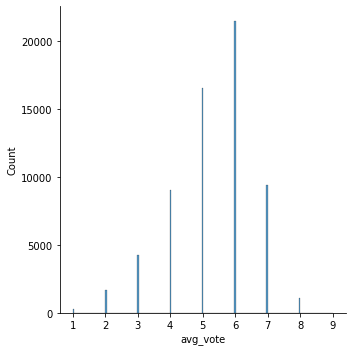

In [16]:
# Looking at distrabution of avg_vote in dataset
sns.displot(movies_df, x="avg_vote")


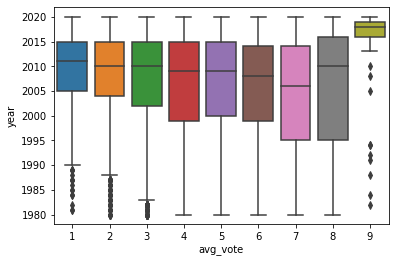

In [17]:
# See how movie year affects avg_vote. 
sns.boxplot(x="avg_vote", y="year", data=movies_df)

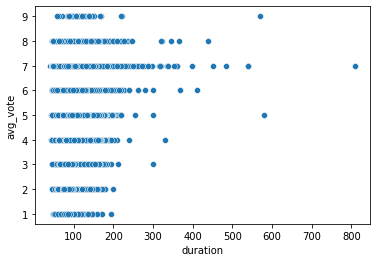

In [18]:
# Checking affect of duration of avg_vote
sns.scatterplot(data=movies_df, x='duration', y='avg_vote')

# Data tranformation



## Converting string values -> numerical values
Converting Director, Actors, Writer, Production Company to numerical value. We are calculating popularity of each person or company by counting the number of time the person/company occurs in the data. The popularity is calculated by (sum of avg_vote of all movies person is in/ frequency of person)
They will give use popularity values for the individual. 

In [19]:

def calculatePopularity(field, arr):
  popularity_dict = {}
  tmp_df = {}
  field_vals = list(give_unique_list(arr).keys())
  count = 1
  for val in field_vals: 

      tmp_df[val] = pd.DataFrame(movies_df[movies_df[field].str.contains(val)])
      rating = tmp_df[val]['avg_vote'].mean() #avg rating 
      popularity_dict[val] = rating
      print("{}/{}".format(count, len(field_vals)))
      count+=1

  with open('/content/drive/My Drive/CMPE-255 Project /{}-popularity-avg-vote.json'.format(field), 'w') as outfile:
    json.dump(data, outfile)




In [22]:
# Calculated propularity and wrote it to json file
# director_popularity = calculatePopularity('director', directors)
# actors_popularity = calculatePopularity('actors', actors)
# writer_popularity = calculatePopularity('writer', writer)
# production_company_popularity = calculatePopularity('production_company', production_company)

# Read json file for popularity 
import json

actors_popularity = None
director_popularity = None
writer_popularity = None
production_company_popularity = None

with open('/content/drive/MyDrive/CMPE-255 Project /actors_popularity.json') as json_file:
    actors_popularity = json.load(json_file)
with open('/content/drive/MyDrive/CMPE-255 Project /directors_popularity.json') as json_file:
    director_popularity = json.load(json_file)
with open('/content/drive/MyDrive/CMPE-255 Project /writer_popularity.json') as json_file:
    writer_popularity = json.load(json_file)
with open('/content/drive/MyDrive/CMPE-255 Project /production_company_popularity.json') as json_file:
    production_company_popularity = json.load(json_file)



In [23]:
def addRating(x):
  rating = 0
  for director in x['director']:
    rating += director_popularity[director]
  x['director_popularity'] = round(rating/len(x['director']), 2)
  return x

movies_df = movies_df.apply(addRating, axis=1)
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote,director_popularity
560,tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"[Drama, Romance]",45,[France],"None, French",[Jean Epstein],"[Jean Epstein, Paul Morand]",[Films Jean Epstein],"[Jeanne Helbling, Suzy Pierson, Olga Day]",7,7.00
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"[Comedy, Fantasy, Romance]",118,[USA],"English, French",[James Mangold],"[Steven Rogers, James Mangold]",[Konrad Pictures],"[Meg Ryan, Hugh Jackman, Liev Schreiber]",6,6.73
4653,tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"[Drama, War]",118,[UK],"English, Italian",[Michael Radford],"[Jessie Kesson, John Francis Lane]",[Associated-Rediffusion Television],"[Phyllis Logan, Giovanni Mauriello, Gianluca F...",6,6.00
13237,tt0062181,Mani in alto!,Rece do góry,1981,1985-01-21,[Drama],76,[Poland],Polish,[Jerzy Skolimowski],"[Andrzej Kostenko, Jerzy Skolimowski]",[Arte France Cinéma],"[Jerzy Skolimowski, Joanna Szczerbic, Tadeusz ...",6,5.75
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"[Action, Crime]",97,[Japan],Japanese,[Kinji Fukasaku],"[Kinji Fukasaku, Fumio Kônami]",[Toei Company],"[Kôji Tsuruta, Tomisaburô Wakayama, Bunta Suga...",7,6.08


In [24]:
def addRating(x):
  rating = 0
  for writer in x['writer']:
    rating += writer_popularity[writer]
  x['writer_popularity'] = round(rating/len(x['writer']), 2)
  return x

movies_df = movies_df.apply(addRating, axis=1)
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote,director_popularity,writer_popularity
560,tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"[Drama, Romance]",45,[France],"None, French",[Jean Epstein],"[Jean Epstein, Paul Morand]",[Films Jean Epstein],"[Jeanne Helbling, Suzy Pierson, Olga Day]",7,7.00,6.75
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"[Comedy, Fantasy, Romance]",118,[USA],"English, French",[James Mangold],"[Steven Rogers, James Mangold]",[Konrad Pictures],"[Meg Ryan, Hugh Jackman, Liev Schreiber]",6,6.73,6.40
4653,tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"[Drama, War]",118,[UK],"English, Italian",[Michael Radford],"[Jessie Kesson, John Francis Lane]",[Associated-Rediffusion Television],"[Phyllis Logan, Giovanni Mauriello, Gianluca F...",6,6.00,6.00
13237,tt0062181,Mani in alto!,Rece do góry,1981,1985-01-21,[Drama],76,[Poland],Polish,[Jerzy Skolimowski],"[Andrzej Kostenko, Jerzy Skolimowski]",[Arte France Cinéma],"[Jerzy Skolimowski, Joanna Szczerbic, Tadeusz ...",6,5.75,5.75
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"[Action, Crime]",97,[Japan],Japanese,[Kinji Fukasaku],"[Kinji Fukasaku, Fumio Kônami]",[Toei Company],"[Kôji Tsuruta, Tomisaburô Wakayama, Bunta Suga...",7,6.08,6.21


In [25]:
def addRating(x):
  rating = 0
  for actor in x['actors']:
      if actor == 'nan':
        continue
      rating += actors_popularity[actor]
  x['actors_popularity'] = round(rating/len(x['actors']), 2)
  return x

movies_df = movies_df.apply(addRating, axis=1)
movies_df.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote,director_popularity,writer_popularity,actors_popularity
560,tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"[Drama, Romance]",45,[France],"None, French",[Jean Epstein],"[Jean Epstein, Paul Morand]",[Films Jean Epstein],"[Jeanne Helbling, Suzy Pierson, Olga Day]",7,7.00,6.75,7.00
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"[Comedy, Fantasy, Romance]",118,[USA],"English, French",[James Mangold],"[Steven Rogers, James Mangold]",[Konrad Pictures],"[Meg Ryan, Hugh Jackman, Liev Schreiber]",6,6.73,6.40,6.04
4653,tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"[Drama, War]",118,[UK],"English, Italian",[Michael Radford],"[Jessie Kesson, John Francis Lane]",[Associated-Rediffusion Television],"[Phyllis Logan, Giovanni Mauriello, Gianluca F...",6,6.00,6.00,6.20
13237,tt0062181,Mani in alto!,Rece do góry,1981,1985-01-21,[Drama],76,[Poland],Polish,[Jerzy Skolimowski],"[Andrzej Kostenko, Jerzy Skolimowski]",[Arte France Cinéma],"[Jerzy Skolimowski, Joanna Szczerbic, Tadeusz ...",6,5.75,5.75,5.98
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"[Action, Crime]",97,[Japan],Japanese,[Kinji Fukasaku],"[Kinji Fukasaku, Fumio Kônami]",[Toei Company],"[Kôji Tsuruta, Tomisaburô Wakayama, Bunta Suga...",7,6.08,6.21,6.56


In [26]:
def addRating(x):
  rating = 0
  for production_company in x['production_company']:
    rating += production_company_popularity[production_company]
  x['production_company_popularity'] = round(rating/len(x['production_company']), 2)
  return x

movies_df = movies_df.apply(addRating, axis=1)
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote,director_popularity,writer_popularity,actors_popularity,production_company_popularity
560,tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"[Drama, Romance]",45,[France],"None, French",[Jean Epstein],"[Jean Epstein, Paul Morand]",[Films Jean Epstein],"[Jeanne Helbling, Suzy Pierson, Olga Day]",7,7.00,6.75,7.00,7.00
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"[Comedy, Fantasy, Romance]",118,[USA],"English, French",[James Mangold],"[Steven Rogers, James Mangold]",[Konrad Pictures],"[Meg Ryan, Hugh Jackman, Liev Schreiber]",6,6.73,6.40,6.04,6.00
4653,tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"[Drama, War]",118,[UK],"English, Italian",[Michael Radford],"[Jessie Kesson, John Francis Lane]",[Associated-Rediffusion Television],"[Phyllis Logan, Giovanni Mauriello, Gianluca F...",6,6.00,6.00,6.20,6.00
13237,tt0062181,Mani in alto!,Rece do góry,1981,1985-01-21,[Drama],76,[Poland],Polish,[Jerzy Skolimowski],"[Andrzej Kostenko, Jerzy Skolimowski]",[Arte France Cinéma],"[Jerzy Skolimowski, Joanna Szczerbic, Tadeusz ...",6,5.75,5.75,5.98,6.05
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"[Action, Crime]",97,[Japan],Japanese,[Kinji Fukasaku],"[Kinji Fukasaku, Fumio Kônami]",[Toei Company],"[Kôji Tsuruta, Tomisaburô Wakayama, Bunta Suga...",7,6.08,6.21,6.56,6.33


In [27]:
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote,director_popularity,writer_popularity,actors_popularity,production_company_popularity
560,tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"[Drama, Romance]",45,[France],"None, French",[Jean Epstein],"[Jean Epstein, Paul Morand]",[Films Jean Epstein],"[Jeanne Helbling, Suzy Pierson, Olga Day]",7,7.00,6.75,7.00,7.00
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"[Comedy, Fantasy, Romance]",118,[USA],"English, French",[James Mangold],"[Steven Rogers, James Mangold]",[Konrad Pictures],"[Meg Ryan, Hugh Jackman, Liev Schreiber]",6,6.73,6.40,6.04,6.00
4653,tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"[Drama, War]",118,[UK],"English, Italian",[Michael Radford],"[Jessie Kesson, John Francis Lane]",[Associated-Rediffusion Television],"[Phyllis Logan, Giovanni Mauriello, Gianluca F...",6,6.00,6.00,6.20,6.00
13237,tt0062181,Mani in alto!,Rece do góry,1981,1985-01-21,[Drama],76,[Poland],Polish,[Jerzy Skolimowski],"[Andrzej Kostenko, Jerzy Skolimowski]",[Arte France Cinéma],"[Jerzy Skolimowski, Joanna Szczerbic, Tadeusz ...",6,5.75,5.75,5.98,6.05
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"[Action, Crime]",97,[Japan],Japanese,[Kinji Fukasaku],"[Kinji Fukasaku, Fumio Kônami]",[Toei Company],"[Kôji Tsuruta, Tomisaburô Wakayama, Bunta Suga...",7,6.08,6.21,6.56,6.33


## Changing date_publish to year, month, and day_of_week.
Since there are some values where only year is present and month and day are missing. 

In [28]:

import datetime

def parseDate(x):
  date_published = x['date_published']
  date = date_published.split('-')
  # Release Date are missing
  if len(date) < 3:
    x['month'] = 0
    x['day_of_week'] = -1
    return x 
  else: 
    date = datetime.datetime(int(date[0]),int(date[1]),int(date[2]))
    x['month'] = date.month
    x['day_of_week'] = date.weekday()
    return x


movies_df = movies_df.apply(parseDate, axis=1)
movies_df.head()

movies_df['date_published'].value_counts()




2010          113
2008          105
1997          100
1999           99
2009           95
             ... 
1995-12-11      1
2019-06-16      1
2005-02-27      1
1990-03-07      1
2005-04-03      1
Name: date_published, Length: 11237, dtype: int64

In [ ]:
movies_df.tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote,director_popularity,writer_popularity,actors_popularity,production_company_popularity,month,day_of_week
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,[Comedy],95,"[France, Belgium]",French,[Ludovic Colbeau-Justin],"[Alexandre Coquelle, Matthieu Le Naour]",[Monkey Pack Films],"[Dany Boon, Philippe Katerine, Anne Serra]",5.3,5.50,4.31,5.60,5.50,1.0,2.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"[Comedy, Drama]",103,[Netherlands],"German, Dutch",[Johan Nijenhuis],"[Radek Bajgar, Herman Finkers]",[Johan Nijenhuis & Co],"[Herman Finkers, Johanna ter Steege, Leonie te...",7.7,4.82,6.83,7.29,5.14,2.0,3.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,[Drama],130,[India],Malayalam,[Vineesh Aaradya],"[Vineesh Aaradya, Vineesh Aaradya]",[RMCC Productions],"[Anoop Chandran, Indrans, Sona Nair]",7.9,7.00,7.00,6.35,7.00,3.0,4.0
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"[Drama, Family]",98,[Turkey],Turkish,[Ahmet Faik Akinci],"[Ahmet Faik Akinci, Kasim Uçkan]",[Gizem Ajans],"[Ahmet Faik Akinci, Belma Mamati, Metin Keçeci]",6.4,5.00,5.00,5.90,6.00,3.0,4.0
85854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,[Drama],74,[Spain],Catalan,[Laura Jou],"[Coral Cruz, Pep Puig]",[La Xarxa de Comunicació Local],"[Maria Morera Colomer, Biel Rossell Pelfort, I...",6.7,6.00,6.00,6.70,6.00,2.0,2.0


# Data Clean
Filling in Null values in the data. We have null values in month, day_of_week, and production_company_popularity

In [ ]:
# Checking for null values
print(movies_df.isnull().sum())

In [29]:
movies_df.tail()
# Updating all 0 & -1 values for month & day of week with mode.
movies_df.loc[(movies_df['month'] == 0), 'month'] = movies_df['month'].mode()
movies_df.loc[(movies_df['day_of_week'] == -1), 'day_of_week'] = movies_df['day_of_week'].mode()


In [31]:
values_to_fill = movies_df['day_of_week']\
                .dropna()\
                .sample(n=movies_df['day_of_week'].isna().sum(), random_state=1,replace=True)

movies_df.loc[movies_df['day_of_week'].isna(), 'day_of_week'] = values_to_fill.to_numpy()

In [32]:
values_to_fill = movies_df['month']\
                .dropna()\
                .sample(n=movies_df['month'].isna().sum(), random_state=1,replace=True)

movies_df.loc[movies_df['month'].isna(), 'month'] = values_to_fill.to_numpy()

In [33]:
values_to_fill = movies_df['production_company_popularity']\
                .dropna()\
                .sample(n=movies_df['production_company_popularity'].isna().sum(), random_state=1,replace=True)

movies_df.loc[movies_df['production_company_popularity'].isna(), 'production_company_popularity'] = values_to_fill.to_numpy()

In [36]:
# Checking for null values
print(movies_df.isnull().sum())


imdb_title_id                    0
title                            0
original_title                   0
year                             0
date_published                   0
genre                            0
duration                         0
country                          0
language                         0
director                         0
writer                           0
production_company               0
actors                           0
avg_vote                         0
director_popularity              0
writer_popularity                0
actors_popularity                0
production_company_popularity    0
month                            0
day_of_week                      0
dtype: int64


In [37]:
# Label encoding for Genre values
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_dummy = pd.DataFrame(mlb.fit_transform(movies_df["genre"]),columns=mlb.classes_, index=movies_df.index)
genre_dummy.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
560,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4334,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4653,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13237,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14127,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#Adding genre to movies_df
movies_df = pd.concat([movies_df,genre_dummy],axis=1)
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,avg_vote,director_popularity,writer_popularity,actors_popularity,production_company_popularity,month,day_of_week,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
560,tt0017938,La glace à trois faces,La glace à trois faces,1983,1983-03-13,"[Drama, Romance]",45,[France],"None, French",[Jean Epstein],"[Jean Epstein, Paul Morand]",[Films Jean Epstein],"[Jeanne Helbling, Suzy Pierson, Olga Day]",7,7.00,6.75,7.00,7.00,3.0,6.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"[Comedy, Fantasy, Romance]",118,[USA],"English, French",[James Mangold],"[Steven Rogers, James Mangold]",[Konrad Pictures],"[Meg Ryan, Hugh Jackman, Liev Schreiber]",6,6.73,6.40,6.04,6.00,3.0,4.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4653,tt0036606,"Another time, another place - Una storia d'amore","Another Time, Another Place",1983,1983-07-15,"[Drama, War]",118,[UK],"English, Italian",[Michael Radford],"[Jessie Kesson, John Francis Lane]",[Associated-Rediffusion Television],"[Phyllis Logan, Giovanni Mauriello, Gianluca F...",6,6.00,6.00,6.20,6.00,7.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13237,tt0062181,Mani in alto!,Rece do góry,1981,1985-01-21,[Drama],76,[Poland],Polish,[Jerzy Skolimowski],"[Andrzej Kostenko, Jerzy Skolimowski]",[Arte France Cinéma],"[Jerzy Skolimowski, Joanna Szczerbic, Tadeusz ...",6,5.75,5.75,5.98,6.05,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14127,tt0064730,Nihon boryoku-dan: Kumicho,Nihon boryoku-dan: Kumicho,2000,1969,"[Action, Crime]",97,[Japan],Japanese,[Kinji Fukasaku],"[Kinji Fukasaku, Fumio Kônami]",[Toei Company],"[Kôji Tsuruta, Tomisaburô Wakayama, Bunta Suga...",7,6.08,6.21,6.56,6.33,7.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Reduction
Drop repetitive columns since data was transformed into different columns

In [40]:

movies_df = movies_df.drop(columns=['date_published','genre','director','writer','actors','production_company'])
movies_df = movies_df.drop(columns=['title','original_title', 'country', 'language']);
# temp = movies_df
movies_df['month'] = movies_df['month'].astype(int)
movies_df['day_of_week'] = movies_df['day_of_week'].astype(int)
movies_df.head()
# temp.head()


,imdb_title_id,year,duration,avg_vote,director_popularity,writer_popularity,actors_popularity,production_company_popularity,month,day_of_week,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
560,tt0017938,1983,45,7,7.00,6.75,7.00,7.00,3,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4334,tt0035423,2001,118,6,6.73,6.40,6.04,6.00,3,4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4653,tt0036606,1983,118,6,6.00,6.00,6.20,6.00,7,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13237,tt0062181,1981,76,6,5.75,5.75,5.98,6.05,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14127,tt0064730,2000,97,7,6.08,6.21,6.56,6.33,7,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# Saving Data so it can used for modeling
movies_df = movies_df.drop(columns=['imdb_title_id'])
movies_df.to_csv('./clean_data.csv', index=False)

In [42]:
movies_df.head()


,year,duration,avg_vote,director_popularity,writer_popularity,actors_popularity,production_company_popularity,month,day_of_week,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
560,1983,45,7,7.00,6.75,7.00,7.00,3,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4334,2001,118,6,6.73,6.40,6.04,6.00,3,4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4653,1983,118,6,6.00,6.00,6.20,6.00,7,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13237,1981,76,6,5.75,5.75,5.98,6.05,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14127,2000,97,7,6.08,6.21,6.56,6.33,7,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Exploration of Clean Data

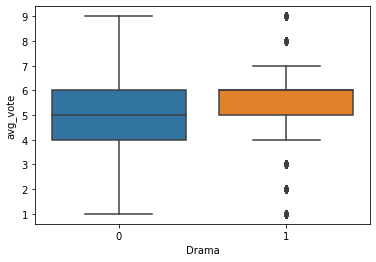

In [ ]:
sns.boxplot(x="Drama", y="avg_vote", data=movies_df)

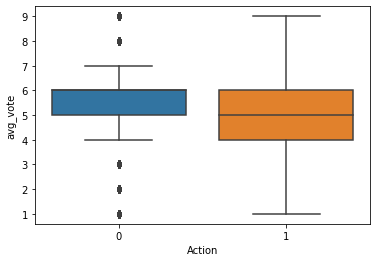

In [ ]:
sns.boxplot(x="Action", y="avg_vote", data=movies_df)

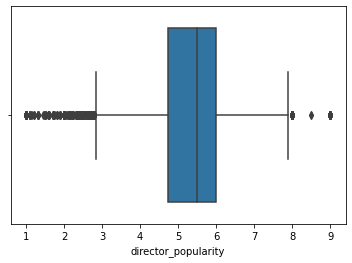

In [ ]:
sns.boxplot(data=movies_df, x='director_popularity')

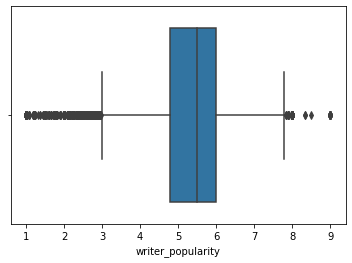

In [ ]:
sns.boxplot(data=movies_df, x='writer_popularity')

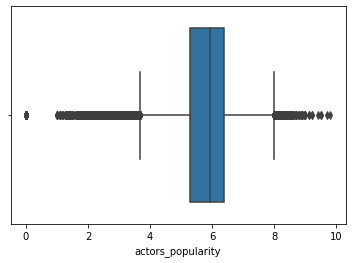

In [ ]:
sns.boxplot(data=movies_df, x='actors_popularity')

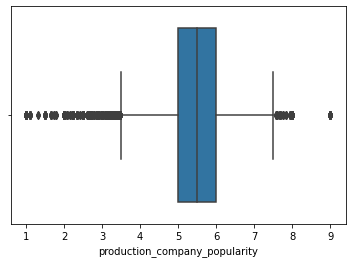

In [ ]:
sns.boxplot(data=movies_df, x='production_company_popularity')

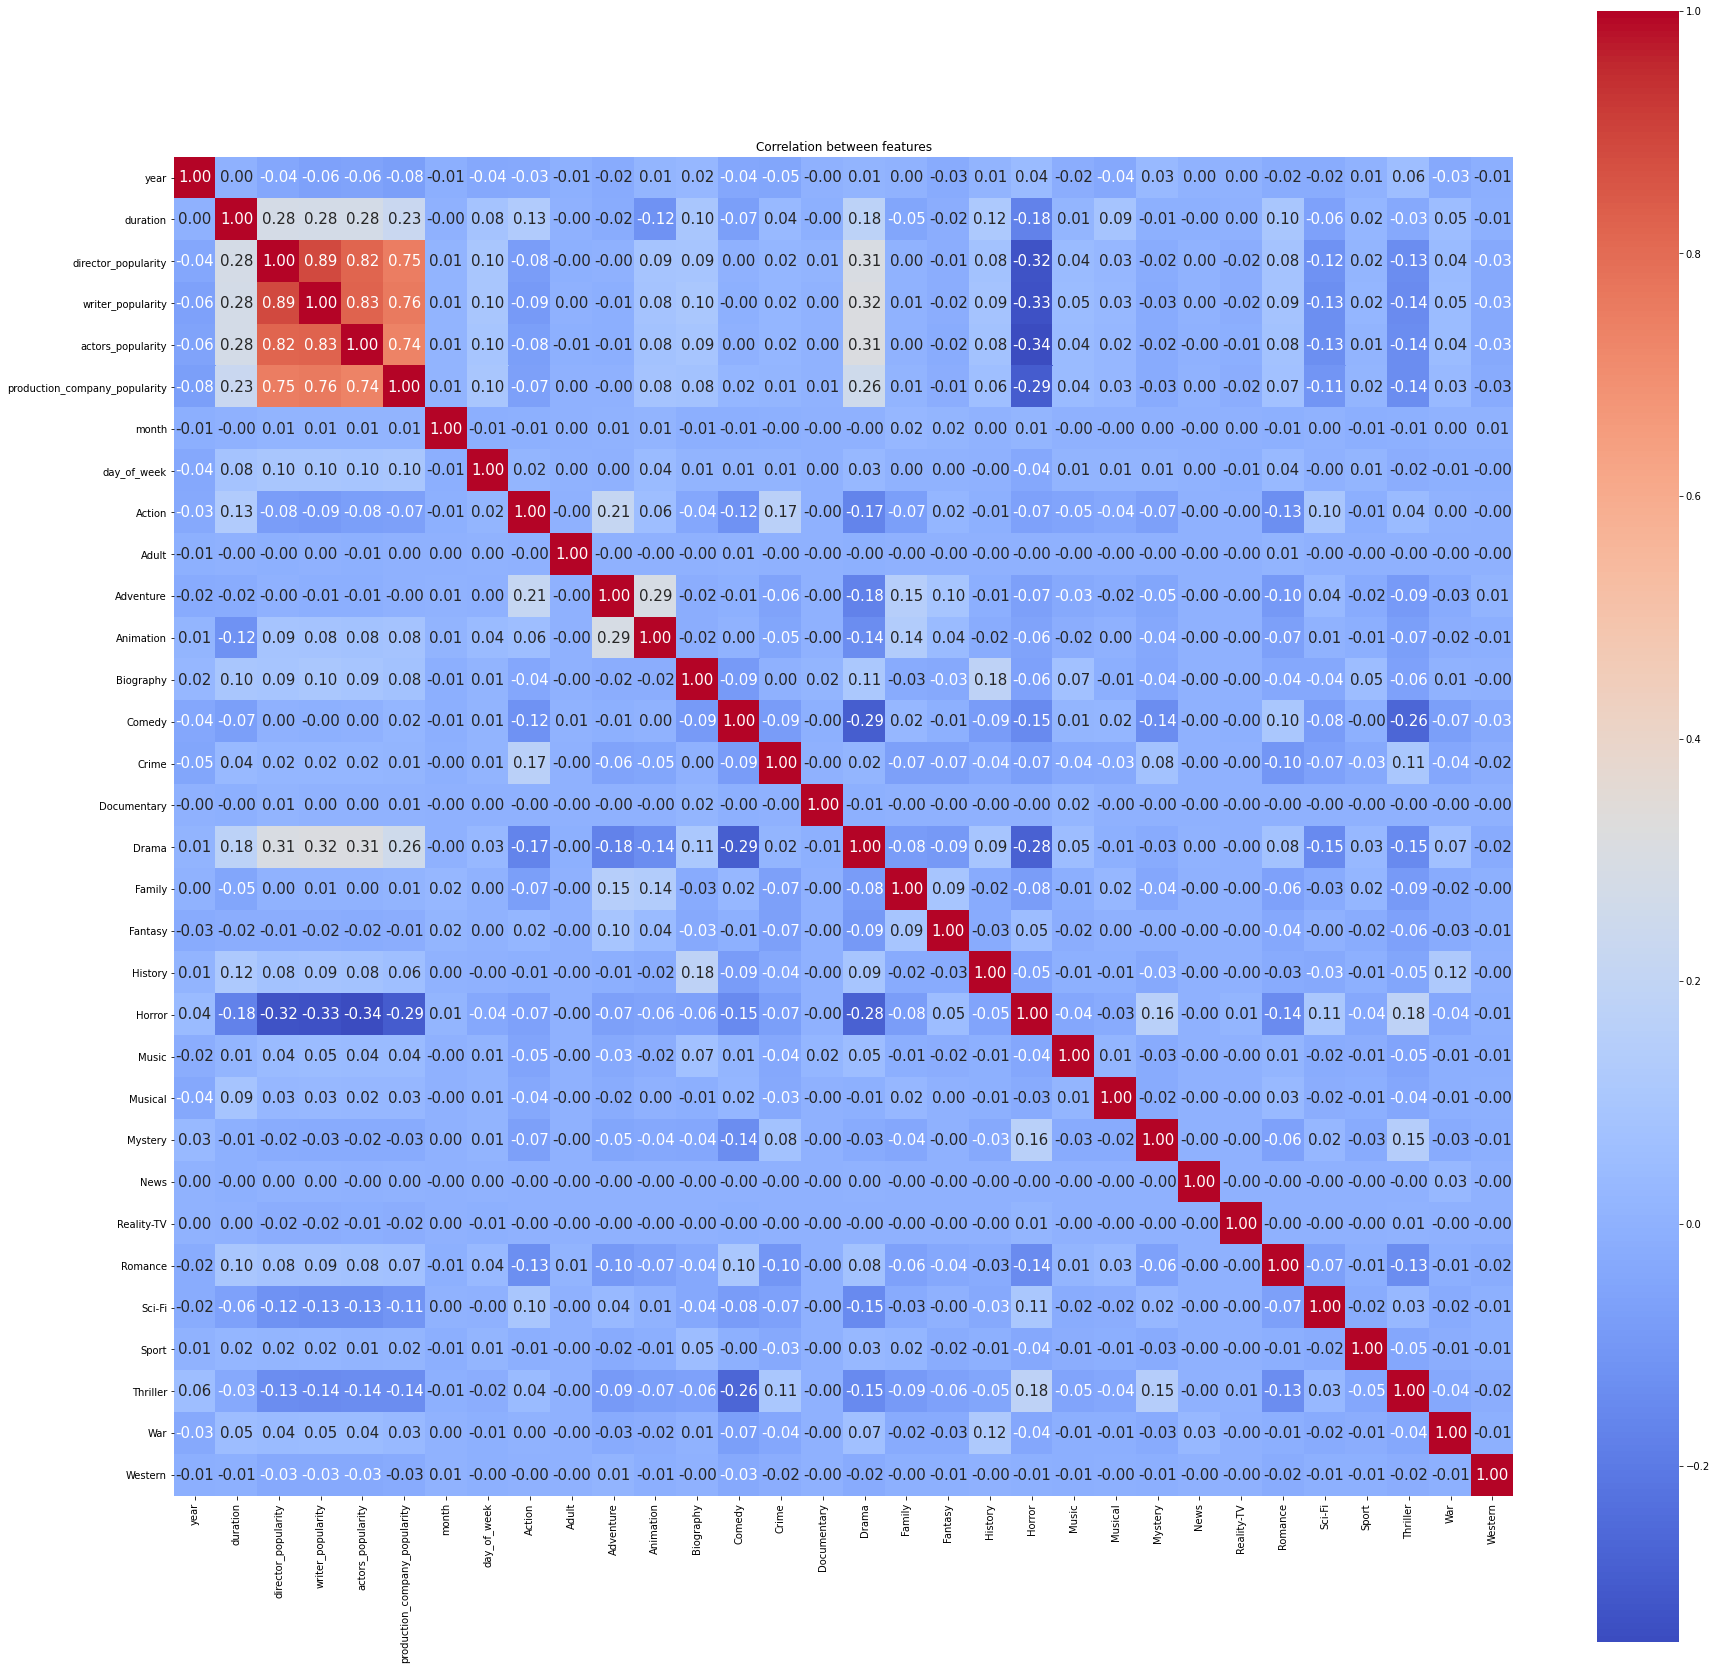

In [ ]:
features = movies_df.drop(columns=['avg_vote'])
movies_corr = features.corr()


plt.figure(figsize=(30, 30))
sns.heatmap(movies_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

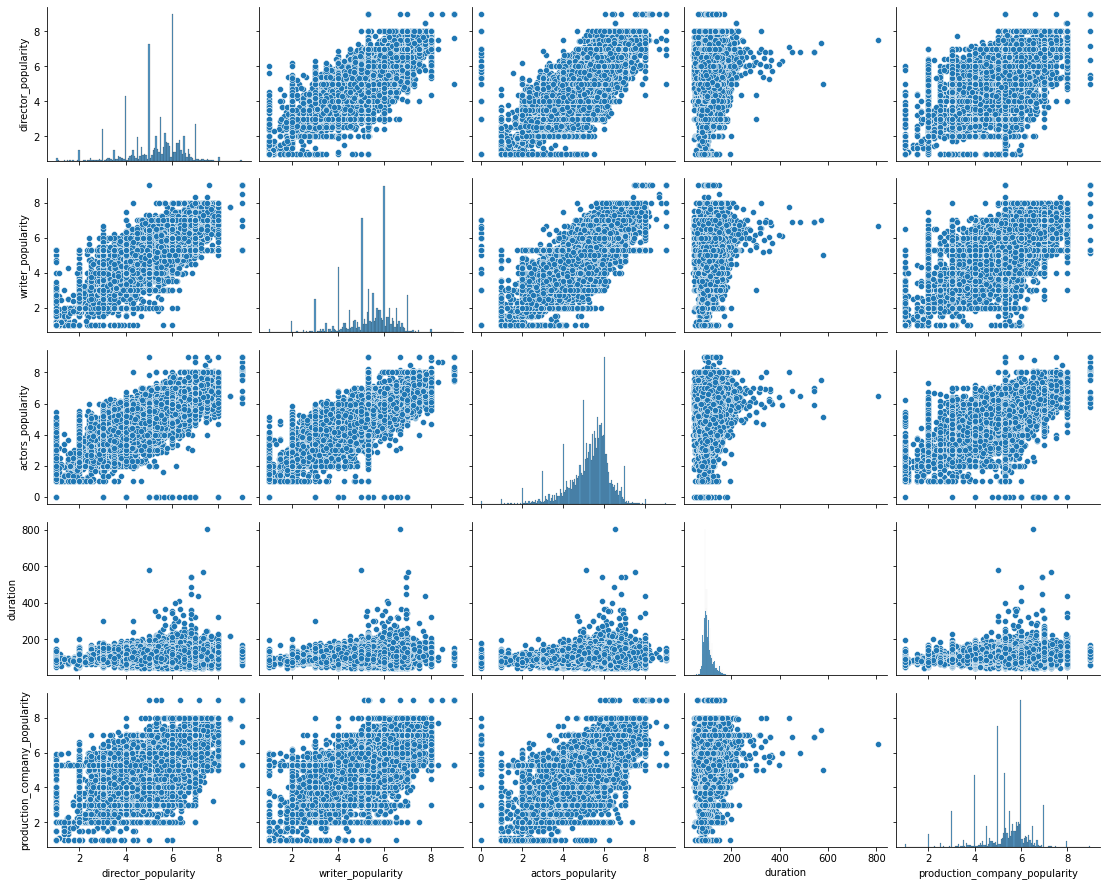

In [43]:
# Plotting pair plots for correlated features
movie_plots=movies_df[['director_popularity','writer_popularity','actors_popularity','duration','production_company_popularity']]

sns.pairplot(movie_plots, height=2.5, aspect=1.25)